In [26]:
import pandas as pd
from geopy.geocoders import Nominatim
import ftfy
import seaborn as sns

In [13]:
metoo_data_semiraw = pd.read_csv("Cleaning_Up_MeToo_Data.csv", encoding = "utf-8")

In [14]:
metoo_data_semiraw.head()

,author_location,created_at,text,id,favorite_count,author_id,author_name,author_verified,retweet,first_name,inferred_gender,inferred_geocoordinates
0,The DMV (Washington. DC),2018-01-27 19:45:16,Wendy Williams Is ‘Sick Of This #MeToo Movemen...,9.573387e+17,0,23597727,93.9 WKYS,False,False,939,unknown,"[[2350 Washington Pl NE #112N, Washington, DC ..."
1,"Scottsdale, AZ",2018-01-27 19:45:16,RT @Amy_Siskind: To every who has a story to t...,9.573387e+17,0,902329672628805632,Jackie Thorpe,False,True,Jackie,unknown,"[[Scottsdale, AZ, USA]]"
2,"Missouri, USA",2018-01-27 19:45:15,"RT @Amy_Siskind: Wow, that was fast - new game...",9.573387e+17,0,467196175,trump's BOSS,False,True,trumps,unknown,"[[Missouri, USA]]"
3,"Texas, USA",2018-01-27 19:45:11,Poor little guy....\n\n#veterans #military #me...,9.573387e+17,0,949355663364362241,Everyday Veteran,False,False,Everyday,unknown,"[[Texas, USA]]"
4,Hell,2018-01-27 19:46:10,Lots of lib falling to the #MeToo movement so ...,9.573390e+17,0,4917121001,Hillary for Prison,False,False,Hillary,female,"[[Hell, MI 48169, USA]]"


In [15]:
## Infer Ethnicity

In [16]:
from ethnicolr import census_ln, pred_census_ln

In [17]:
def get_last_names(author_name):
    try:
        author_name_str = author_name.encode("utf-8")
        last_name = author_name_str.split(" ")[-1]
        return last_name
    except AttributeError as e:
        print("Cannot encode {}".format(author_name))

In [18]:
metoo_data_semiraw["last_name"] = metoo_data_semiraw["author_name"].apply(get_last_names)

Cannot encode nan
Cannot encode nan
Cannot encode nan
Cannot encode nan
Cannot encode nan
Cannot encode nan


In [19]:
ethnicity_preds = pred_census_ln(metoo_data_semiraw, 'last_name')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [22]:
ethnicity_preds.drop(["inferred_geocoordinates"], axis = 1, inplace = True)

In [23]:
ethnicity_preds.head()

,author_location,created_at,text,id,favorite_count,author_id,author_name,author_verified,retweet,first_name,inferred_gender,last_name,race,api,black,hispanic,white
0,The DMV (Washington. DC),2018-01-27 19:45:16,Wendy Williams Is ‘Sick Of This #MeToo Movemen...,9.573387e+17,0,23597727,93.9 WKYS,False,False,939,unknown,WKYS,white,0.056188,0.034674,0.037256,0.444610
1,"Scottsdale, AZ",2018-01-27 19:45:16,RT @Amy_Siskind: To every who has a story to t...,9.573387e+17,0,902329672628805632,Jackie Thorpe,False,True,Jackie,unknown,Thorpe,white,0.003309,0.461259,0.012624,0.976176
2,"Missouri, USA",2018-01-27 19:45:15,"RT @Amy_Siskind: Wow, that was fast - new game...",9.573387e+17,0,467196175,trump's BOSS,False,True,trumps,unknown,BOSS,white,0.008496,0.295922,0.029075,0.986167
3,"Texas, USA",2018-01-27 19:45:11,Poor little guy....\n\n#veterans #military #me...,9.573387e+17,0,949355663364362241,Everyday Veteran,False,False,Everyday,unknown,Veteran,hispanic,0.050004,0.005929,0.140123,0.109381
4,Hell,2018-01-27 19:46:10,Lots of lib falling to the #MeToo movement so ...,9.573390e+17,0,4917121001,Hillary for Prison,False,False,Hillary,female,Prison,white,0.009400,0.227525,0.023380,0.931743


In [24]:
gender_groupby = ethnicity_preds.groupby(["inferred_gender"]).size()

In [25]:
gender_groupby.

inferred_gender
female           15044
male             11872
mostly_female     2384
mostly_male       1380
unknown          31046
dtype: int64

In [42]:
ethnicity_preds["race"] = ethnicity_preds["race"].replace("api", "asian pacific islander")

In [65]:
gender_percents = ethnicity_preds.loc[~ethnicity_preds["inferred_gender"].isin(["unknown"])].groupby(["inferred_gender"]).size() / (15044 + 11872 + 2384 + 1380) * 100

In [72]:
gender_percents_df = pd.DataFrame(gender_percents)

In [77]:
gender_percents_df.reset_index().rename(columns = {0:"Percent"})

,inferred_gender,Percent
0,female,49.035202
1,male,38.696219
2,mostly_female,7.770535
3,mostly_male,4.498044


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Testing'

ax.set_xticklabels(labels)

plt.show()


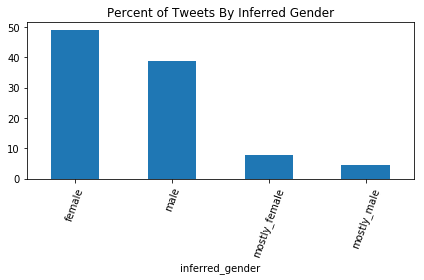

In [98]:
gender_percents.plot(kind = "bar", color = "C0")
plt.title("Percent of Tweets By Inferred Gender")
plt.xticks(rotation = 70)
plt.tight_layout()
plt.savefig("NumTweets_InferredGender_Pcts.png")
plt.show()
plt.close()
plt.clf()

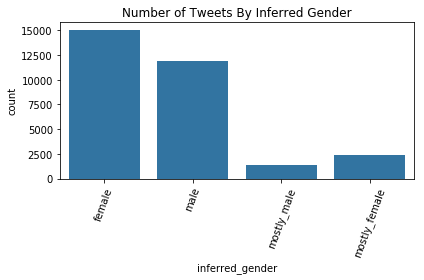

In [84]:
sns.countplot(x="inferred_gender", data=ethnicity_preds.loc[~ethnicity_preds["inferred_gender"].isin(["unknown"])], color = "C0")
plt.title("Number of Tweets By Inferred Gender")
plt.xticks(rotation = 70)
plt.tight_layout()
plt.savefig("NumTweets_InferredGender.png")
plt.show()
plt.close()
plt.clf()
#sns.barplot(x="inferred_gender", y="retweet", hue="race", data = ethnicity_preds)

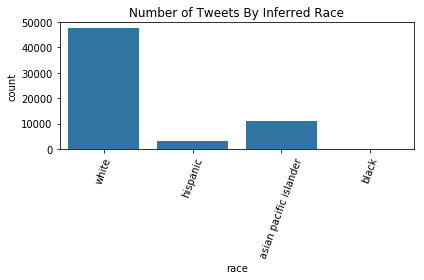

In [85]:
sns.countplot(x="race", data=ethnicity_preds, color = "C0")
plt.title("Number of Tweets By Inferred Race")
plt.xticks(rotation = 70)
plt.tight_layout()
plt.savefig("NumTweets_InferredRace.png")
plt.show()
plt.close()
plt.clf()

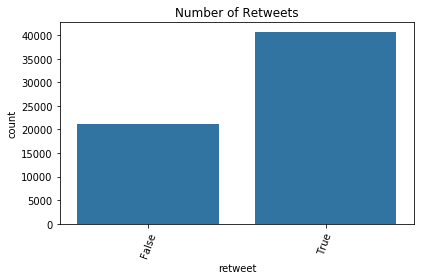

In [87]:
sns.countplot(x="retweet", data=ethnicity_preds.loc[ethnicity_preds["retweet"].isin(["True", "False"])], color = "C0")
plt.title("Number of Retweets")
plt.xticks(rotation = 70)
plt.tight_layout()
plt.savefig("NumTweets_Retweets.png")
plt.show()
plt.close()
plt.clf()

In [99]:
ethnicity_preds.to_csv("Cleaned_MeToo_Data.csv", index = False, encoding = "utf-8")

In [104]:
rts = pd.read_csv("MeToo_ReTweets.csv", encoding = "utf-8")

In [105]:
ogs = pd.read_csv("MeToo_OriginalTweets.csv", encoding = "utf-8")

In [106]:
rts.shape

(40665, 11)

In [107]:
ogs.shape

(21071, 11)